In [1]:
import cv2
import numpy as np
from plyfile import PlyData, PlyElement
import glob
import matplotlib.pyplot as plt

from pixloc.pixlib.datasets.drs import DRS
from pixloc.utils.quaternions import qvec2rotmat

np.set_printoptions(precision=3)

In [2]:
ply_files = glob.glob("/tmp/*.ply")
plys = []
for ply_file in ply_files[:10]:
    with open(ply_file, "rb") as f:
        plys.append(PlyData.read(f))


In [3]:
sample_ply = plys[-1]

In [4]:
vertices = np.stack((sample_ply["vertex"]["x"],sample_ply["vertex"]["y"],sample_ply["vertex"]["z"]))

In [5]:
vertices.shape

(3, 131072)

(-8.125522017478943, 28.432615160942078, -3.104452705383301, 5.44844970703125)

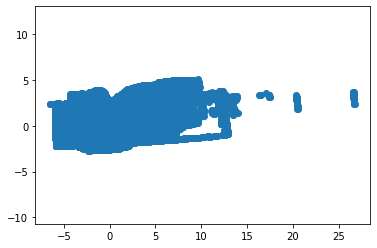

In [6]:
plt.scatter(vertices[1,:], vertices[2,:])
plt.axis("equal")

In [7]:
dataset = DRS({}).get_dataset({})

[11/25/2021 18:49:59 pixloc.pixlib.datasets.base_dataset INFO] Creating dataset DRS


In [8]:
len(dataset)

1412

In [9]:
def list_rotate(l, n):
    return l[n:] + l[:n]

In [10]:
def drs_q_t_to_T(q, t):
    q = list_rotate(list(q), 3)
    q = np.array(q)
    t = np.array(t)
    rot_mat = qvec2rotmat(q)
    return np.vstack((np.hstack((rot_mat, t[:,None])), np.array([0,0,0,1])[None,:]))

qvec2rotmat(np.array([-0.499, 0.501, -0.499, 0.501]))

array([[-4.000e-06,  0.000e+00,  1.000e+00],
       [-1.000e+00, -4.004e-03,  0.000e+00],
       [ 4.000e-03, -1.000e+00, -4.000e-06]])

In [11]:
drs_q_t_to_T(np.array([-0.499, 0.501, -0.499, 0.501]), np.array([1,0,0]))

array([[-4.000e-06,  0.000e+00,  1.000e+00,  1.000e+00],
       [-1.000e+00,  3.996e-03,  0.000e+00,  0.000e+00],
       [-4.000e-03, -1.000e+00, -4.000e-06,  0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00]])

In [12]:
B_r_BL = [0.001, 0.000, 0.091]
q_BL   = [0.0, 0.0, 0.0, 1.0]

T_base_lidar = drs_q_t_to_T(q_BL, B_r_BL)
print(T_base_lidar)

[[1.    0.    0.    0.001]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.091]
 [0.    0.    0.    1.   ]]


In [13]:
q_BC = [-0.499, 0.501, -0.499, 0.501] # the base here is the bottom of NUC
B_r_BC = [0.082, 0.053, 0.077]
    
T_base_camera_0 = drs_q_t_to_T(q_BC, B_r_BC)
print(T_base_camera_0)

[[-4.000e-06  0.000e+00  1.000e+00  8.200e-02]
 [-1.000e+00  3.996e-03  0.000e+00  5.300e-02]
 [-4.000e-03 -1.000e+00 -4.000e-06  7.700e-02]
 [ 0.000e+00  0.000e+00  0.000e+00  1.000e+00]]


In [14]:
T_camera_0_lidar = np.linalg.inv(T_base_camera_0).dot(T_base_lidar)

In [15]:
T_camera_0_lidar

array([[-1.598e-08, -1.000e+00, -3.996e-03,  5.294e-02],
       [-4.000e-06,  4.000e-03, -1.000e+00, -1.421e-02],
       [ 1.000e+00, -4.000e-06, -1.598e-08, -8.100e-02],
       [ 0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00]])

In [16]:
datum = dataset.__getitem__(0)

In [17]:
datum['ref']['image'].shape

torch.Size([3, 540, 720])

In [18]:
datum['ref']['points3D'].shape

torch.Size([131072, 3])

In [19]:
datum

{'ref': {'image': tensor([[[-0.4255, -0.4255, -0.4255,  ..., -0.4216, -0.4216, -0.4216],
           [-0.4255, -0.4255, -0.4255,  ..., -0.4176, -0.4137, -0.4137],
           [-0.4255, -0.4255, -0.4255,  ..., -0.4176, -0.4176, -0.4137],
           ...,
           [-0.4294, -0.4255, -0.4216,  ..., -0.4098, -0.4137, -0.4137],
           [-0.4216, -0.4176, -0.4137,  ..., -0.4098, -0.4137, -0.4137],
           [-0.4216, -0.4216, -0.4216,  ..., -0.4098, -0.4137, -0.4137]],
  
          [[-0.4255, -0.4255, -0.4255,  ..., -0.4216, -0.4216, -0.4216],
           [-0.4255, -0.4255, -0.4255,  ..., -0.4176, -0.4137, -0.4137],
           [-0.4255, -0.4255, -0.4255,  ..., -0.4176, -0.4176, -0.4137],
           ...,
           [-0.4294, -0.4255, -0.4216,  ..., -0.4098, -0.4137, -0.4137],
           [-0.4216, -0.4176, -0.4137,  ..., -0.4098, -0.4137, -0.4137],
           [-0.4216, -0.4216, -0.4216,  ..., -0.4098, -0.4137, -0.4137]],
  
          [[-0.4255, -0.4255, -0.4255,  ..., -0.4216, -0.4216, -0.42

tensor([[ 0.9999,  0.0088,  0.0110],
        [-0.0089,  0.9999,  0.0068],
        [-0.0109, -0.0069,  0.9999]])